# <center> Basic Data Preparation </center>

<center> <img src="https://i.ytimg.com/vi/BiPzz1xZ0XI/maxresdefault.jpg" width=800 height=600 /> </center>

## Basic ToolBox  - Preparação dos Dados I

A preparação de dados é o processo de preparar os dados brutos a fim de adequá-los para etapas posteriores de processamento e análise. É o ato de transformá-los de sua forma bruta em um formato processável e relevante, envolvendo limpeza, tratamento e formatação, a fim de facilitar análises e extrair insights que tenham significado. Dataprep nos permite analisar rapidamente novos conjuntos de dados, e a flexibilidade dele oferece suporte a todas as nossas necessidades de transformação de dados.

É importante lembrar que é essencial ajustar o escalador apenas nos dados de treinamento e, em seguida, aplicá-lo aos conjuntos de treinamento e teste separadamente.
 

A normalização e a padronização de dados são técnicas cruciais para preparar seus dados antes de alimentar modelos de Machine Learning. A escolha entre elas depende do seu conjunto de dados e do algoritmo que você está usando. Ao aplicar essas técnicas, você ajuda seus modelos a aprender de forma mais eficiente e a obter melhores resultados.

In [1]:
# libs
#!pip install category-encoders
#!pip install  feature-engine
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
#from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando dados
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/diabetes.csv')
df_diabetes.sample(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
579,2,197,70,99,0,34.7,0.575,62,tested_positive
681,0,162,76,36,0,49.6,0.364,26,tested_positive
160,4,151,90,38,0,29.7,0.294,36,tested_negative
311,0,106,70,37,148,39.4,0.605,22,tested_negative
761,9,170,74,31,0,44.0,0.403,43,tested_positive


In [3]:
# Variaveis Independentes
X_diabetes = df_diabetes.drop(columns=['class'])

# Variavel dependente
Y_diabetes = df_diabetes['class']

In [4]:
# Treino e Teste
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, 
                                                                                        Y_diabetes,
                                                                                       train_size=0.85,
                                                                                       random_state=123)

#### **Sem Normalização** 

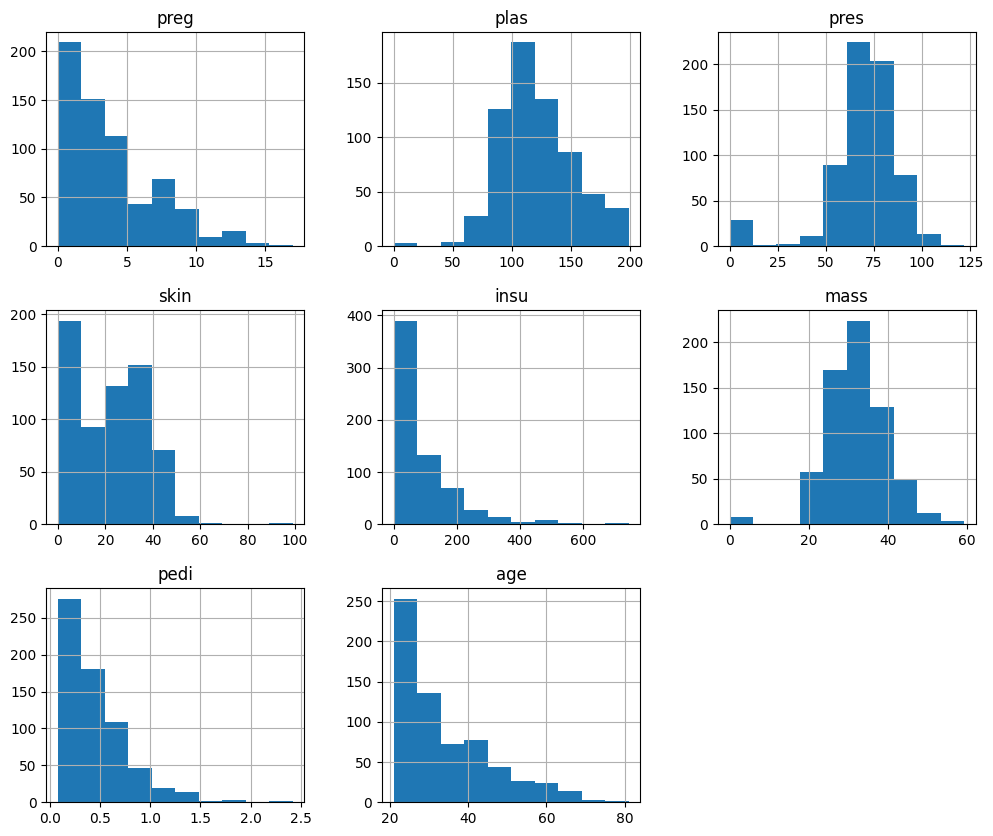

In [5]:
# histograma para analise univariada para distribuição dos dados
X_train_diabetes.hist(figsize=(12,10));

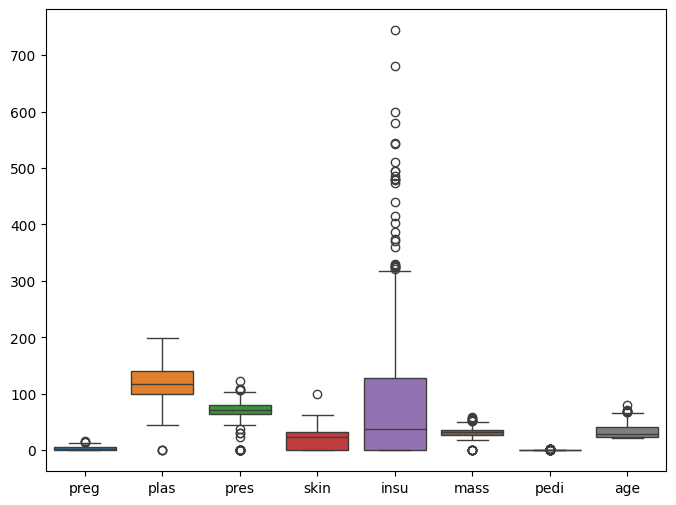

In [6]:
plt.figure(figsize=(8,6))
sn.boxplot(X_train_diabetes)
plt.show()

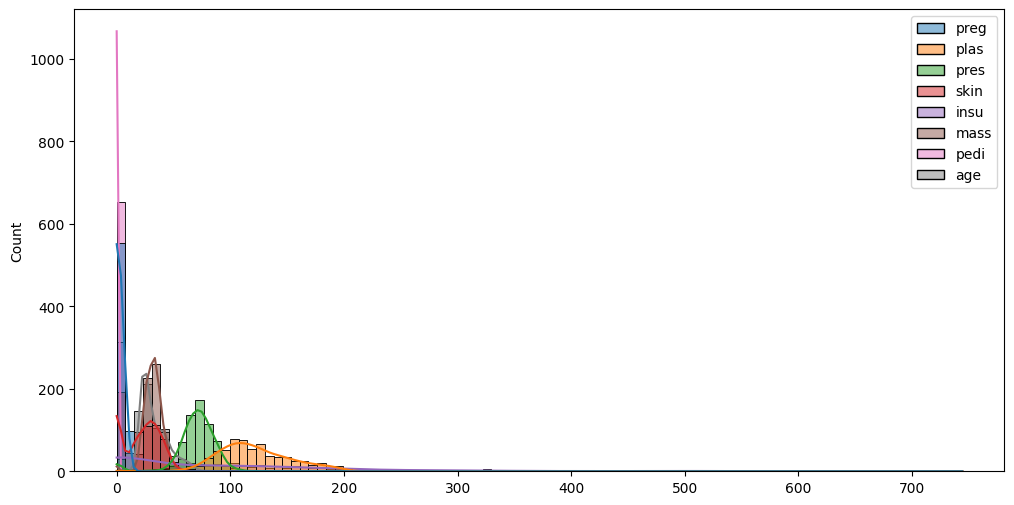

In [7]:
plt.figure(figsize=(12,6))
sn.histplot(X_train_diabetes, kde=True )
plt.show()

# <center> Data Preparation - Preparando os Dados </center>

## ``Normalização de dados``

A normalização dos dados faz com que todos os dados fiquem em um intervalo de 0 e 1, colocando deste modo, todos em uma mesma escala

padronização vamos gerar uma média igual a 0 e desvio padrão igual a 1, já normalizar deixa os dados num intervalo de 0 e 1.

O **processo de data preparation** é **anterior ao treinamento** do algoritmo de machine-learning. A ideia é **criar um processo** que, para **cada entrada** (feature/variável), realize uma **transformação específica**. 

Vamos descrever algumas dessas transformações a partir de agora, começando pelas **variáveis numéricas**:

#### Variáveis Numéricas

As **variáveis mais fáceis de lidar** são as do **tipo numérico**, pois os algoritmos de machine-learning já são capazes de **interpretá-las em sua forma "bruta"**, contudo, os algoritmos e seus processos de otimização podem se beneficiar dessa transformação. 

No geral, os algoritmos de machine learning **não entendem** que as **features são de unidades diferentes**, e podem **assumir que variáveis com escala maior** devem receber um** "peso" maior**, por isso, geralmente os algoritmos que se baseiam no **cálculo de distâncias** ou **descidas de gradiente** podem **sofrer com o fator de escala**, e para evitar esse tipo de situação, utilizamos **métodos de scaling**. 

Agora vamos apresentar **três processos de transformação**, suas **características**, **pontos fortes** e **fracos**:

### **MinMax Scaler** - Sensível a outliers.

Este estimador dimensiona e traduz cada recurso individualmente, de modo que fique no intervalo determinado no conjunto de treinamento, por exemplo, entre zero e um.Essa transformação é frequentemente usada como uma alternativa à escala de média zero e variância unitária.

MinMax Scaler não reduz o efeito dos valores discrepantes, mas os reduz linearmente para um intervalo fixo, onde o maior ponto de dados que ocorre corresponde ao valor máximo e o menor corresponde ao valor mínimo. 

<img src=https://cdn-images-1.medium.com/max/800/0*K2QwZ16bEAxA4hUe.jpg height=300 width=500 />

**Função Python MinMax**

In [8]:
# definindo uma Função
def MinMax(x): 
    # Aplicando a equação "MinMaxScaler"
    return (x - x.min()) / (x.max() - x.min() )

In [9]:
# Atribuindo a uma variavel o Dataset normalizado
X_train_diabetes_MinMax = MinMax(X_train_diabetes)

In [10]:
# Filtrar pelo index e coluna
X_train_diabetes_MinMax[X_train_diabetes_MinMax.index == 446]['age']
# variavel "age" index 446

446    0.116667
Name: age, dtype: float64

In [11]:
# Filtrar pelo index e pelo index
X_train_diabetes_MinMax.T[446][7]
# variavel "age" index 446

0.11666666666666667

#### **Com Normalização** - MinMax()

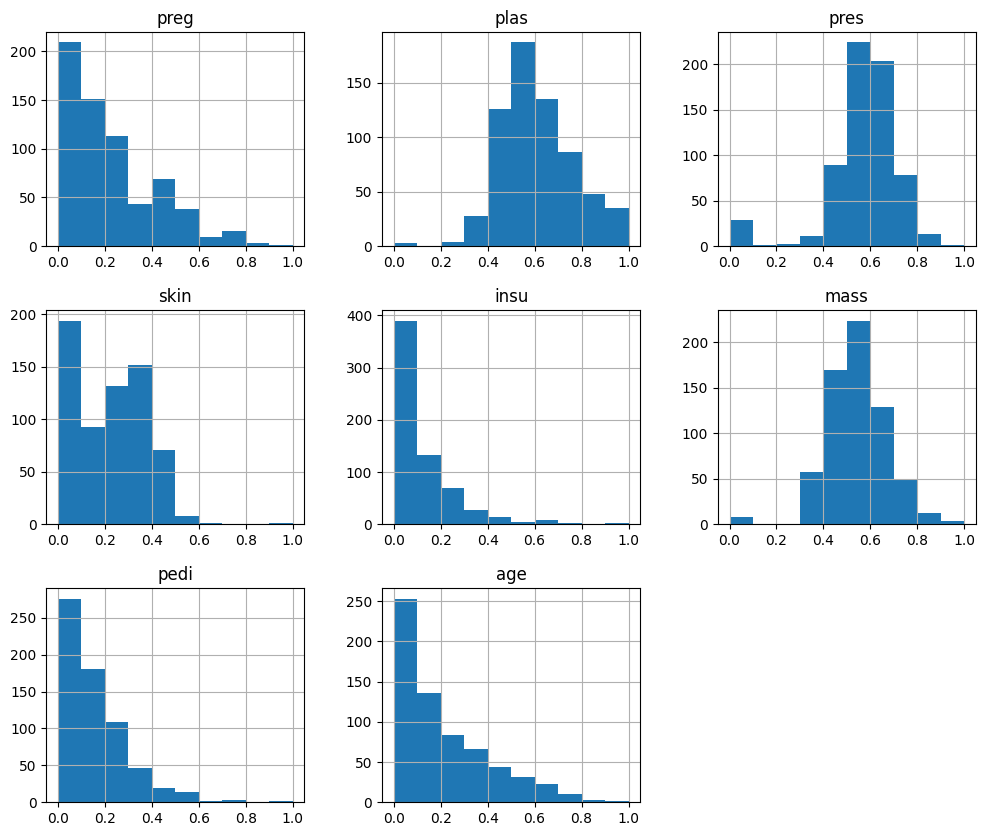

In [12]:
# Observando a distribuilção dos dados após normalização
X_train_diabetes_MinMax.hist(figsize=(12,10));

### sklearn.preprocessing.``MinMaxScaler``

* Dimensiona o conjunto de dados de modo que todos os valores de recursos estejam no intervalo fixo [0, 1].A escala padrão para o **MinMaxScaler** é redimensionar as variáveis ​​para o intervalo [0,1], embora uma escala preferida possa ser especificada por meio do argumento “ feature_range ” e especificar uma tupla, incluindo o mínimo e o máximo para todas as variáveis. Para utilizar esse transformador, precisaremos dos métodos ```.fit()``` e ```.transform()```: **retorna** uma **classe de objeto MinMaxScaler**

#### **Com Normalização** - MinMaxScaler()

In [13]:
# Atribuindo a uma variavel objeto MinMaxScaler
obj_minmax = MinMaxScaler()

# Extraindo os valores máximo e mínimo do vetor
obj_minmaxScaler = obj_minmax.fit(X_train_diabetes)
# fit_transform() ->  extrair os parâmetros e já aplicar a transformação desejada.

# Transformando em dados manipulaveis (arrays)
obj_minmaxScaler = obj_minmaxScaler.transform(X_train_diabetes)

# Transformando os dados em arrays para DataFrame
df_minmax = pd.DataFrame(obj_minmaxScaler)

# Atribuindo o cabeçalho da variavel a sua coluna referente
df_minmax.columns = X_train_diabetes.columns

# Filtrando pelo inde e pelo index
df_minmax.T[0][7]

0.1166666666666667

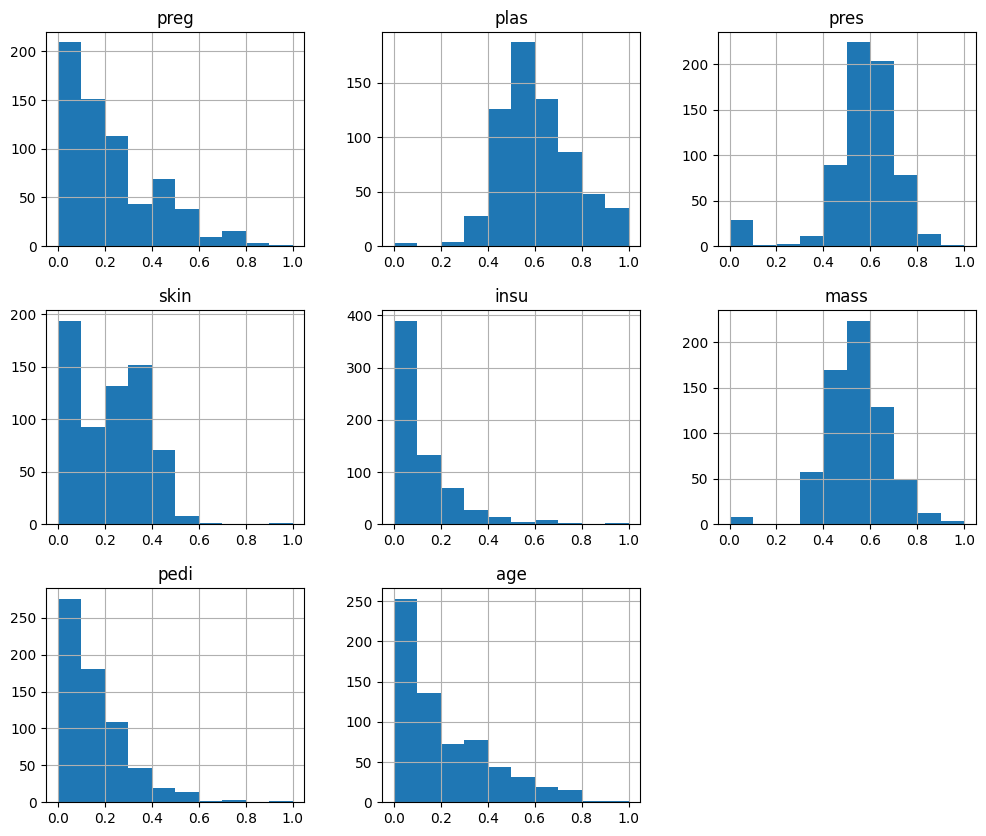

In [14]:
# Analise univariada para distribuição dos dados (Pós Normalização)
df_minmax.hist(figsize=(12,10));

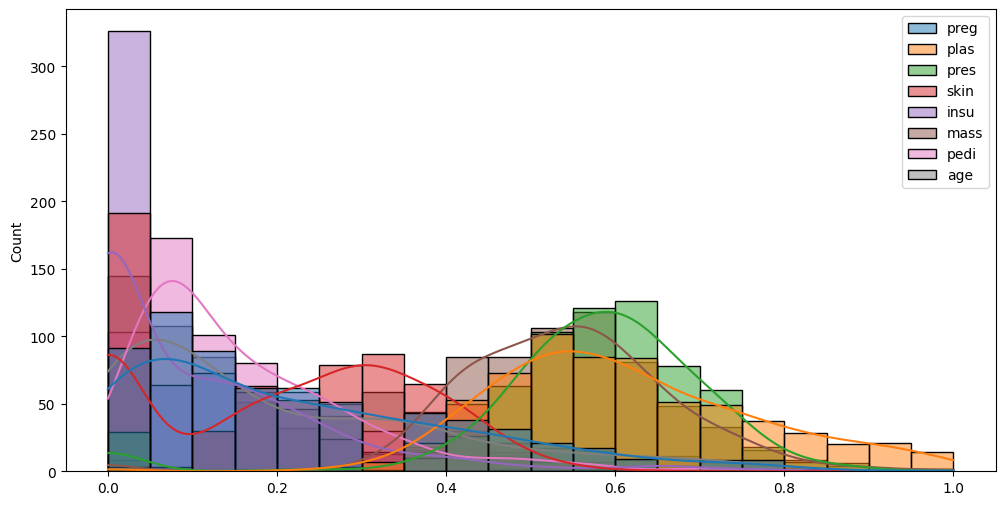

In [15]:
# Analise univariada para distribuição dos dados (Pós Normalização)
plt.figure(figsize=(12,6))
sn.histplot(df_minmax, kde=True )
plt.show()

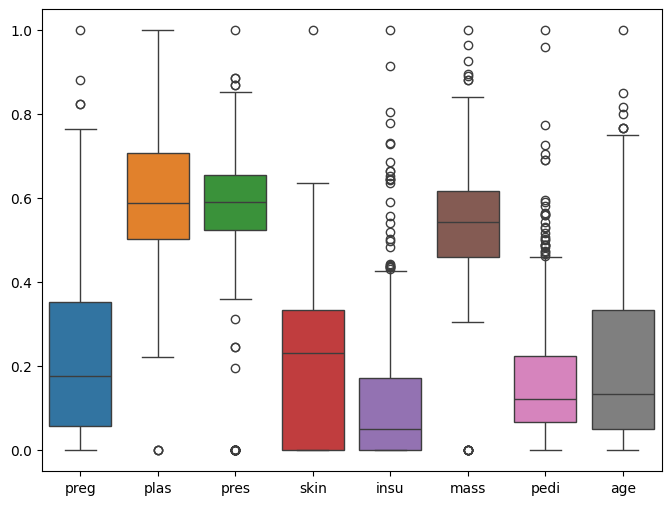

In [16]:
# Analise univariada para distribuição dos dados (Pós Normalização)
plt.figure(figsize=(8,6))
sn.boxplot(df_minmax)
plt.show()

#### **Reverter** - MinMaxScaler()

In [17]:
# Reverter os dados normalizados no formato original
data_original = obj_minmax.inverse_transform(df_minmax)

# Transformar os dados originais em um DataFrame
df_original = pd.DataFrame(data_original)

# Atribuindo o cabeçalho da variavel as suas respectivas colunas
df_original.columns = X_train_diabetes.columns


df_original.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,1.0,100.0,72.0,12.0,70.0,25.3,0.658,28.0
1,11.0,138.0,74.0,26.0,144.0,36.1,0.557,50.0
2,4.0,132.0,86.0,31.0,0.0,28.0,0.419,63.0
3,4.0,115.0,72.0,0.0,0.0,28.9,0.376,46.0
4,1.0,136.0,74.0,50.0,204.0,37.4,0.399,24.0


## ``Padronização dos Dados`` 


Na **padronização** gera se uma **média igual a 0** e **desvio padrão igual a 1**.Nesse método, **extraímos a média** e o **desvio padrão**. A partir daí, **subtraímos a média** de cada amostra e **dividimos o resultado** pelo **desvio padrão**. Após a transformação, os dados ficam **centrados em 0** e possuem **desvio padrão igual a 1**.

Esse método, não cria uma distribuição normal,a padronização centra os dados em 0, além disso, **não há um range definido**, como no Min Max, porém, o **range das features se tornam próximos** pela transformação. Se os nossos **dados possuem distribuição normal**, os algoritmos podem se **beneficiar mais utilizando** ``StandardScaler`` em vez de **MinMaxScaler**.

#### **StandardScaler** - Sensível a outliers

Na presença de outliers, o StandardScaler não garante escalas de recursos balanceadas, devido à influência dos outliers ao calcular a média empírica e o desvio padrão

**Padronizar os dados normalmente é feita usando a fórmula z-score**

<img src=https://cdn-images-1.medium.com/max/800/0*vQEjz0mvylP--30Q.GIF height=300 width=450/>

**Função Python Padronização Z-score**

In [18]:
# definindo uma função para padronizar os dados
def padronizar(x):
    return (x - x.mean()) / np.std(x)

In [19]:
# Atribuindo a uma variavel o DF padronizado
df_padro = padronizar(X_train_diabetes)
df_padro.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age
446,-0.841513,-0.671703,0.148112,-0.549254,-0.087937,-0.887575,0.613809,-0.448716
614,2.168177,0.545271,0.252851,0.321010,0.569147,0.518456,0.299409,1.416902
479,0.061394,0.353117,0.881284,0.631819,-0.709504,-0.536067,-0.130168,2.519313


In [20]:
# Reiniciando o indice do DF
df_padro = df_padro.reset_index(drop=True)
df_padro.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age
0,-0.841513,-0.671703,0.148112,-0.549254,-0.087937,-0.887575,0.613809,-0.448716
1,2.168177,0.545271,0.252851,0.321010,0.569147,0.518456,0.299409,1.416902
2,0.061394,0.353117,0.881284,0.631819,-0.709504,-0.536067,-0.130168,2.519313


### sklearn.preprocessing.``StandardScaler``

* Padronize os recursos removendo a média e dimensionando para a variação unitária. A centralização e o dimensionamento acontecem independentemente de cada recurso, calculando as estatísticas relevantes nas amostras do conjunto de treinamento. A média e o desvio padrão são então armazenados para serem usados ​​em dados posteriores usando ``transform``.

#### **Com Padronização** - StandardScaler()

In [21]:
# Gerando um Objeto StandardScaler
obj_stand = StandardScaler()

# Obtendo a média zero e desvio padrão unitario e transformando em dados manipulaveis
X_train_diabetes_stand = obj_stand.fit_transform(X_train_diabetes)

# Transfomrnaod os dados padronizados em um DataFrame
df_diabetes_stand = pd.DataFrame(X_train_diabetes_stand,
                                 columns=X_train_diabetes.keys())

In [22]:
# Transfomrnaod os dados padronizados em um DataFrame
df_diabetes_stand2 = pd.DataFrame(X_train_diabetes_stand,
                                 columns=X_train_diabetes.columns)

In [23]:
df_diabetes_stand2.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age
0,-0.841513,-0.671703,0.148112,-0.549254,-0.087937,-0.887575,0.613809,-0.448716
1,2.168177,0.545271,0.252851,0.321010,0.569147,0.518456,0.299409,1.416902
2,0.061394,0.353117,0.881284,0.631819,-0.709504,-0.536067,-0.130168,2.519313


In [24]:
df_diabetes_stand.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age
0,-0.841513,-0.671703,0.148112,-0.549254,-0.087937,-0.887575,0.613809,-0.448716
1,2.168177,0.545271,0.252851,0.321010,0.569147,0.518456,0.299409,1.416902
2,0.061394,0.353117,0.881284,0.631819,-0.709504,-0.536067,-0.130168,2.519313


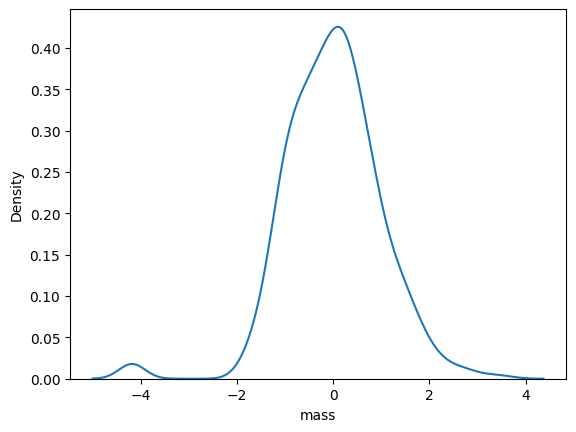

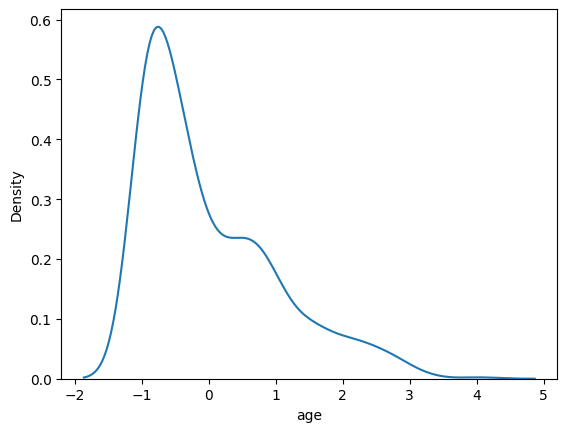

In [25]:
sn.kdeplot(df_diabetes_stand['mass'])
plt.show()
sn.kdeplot(df_diabetes_stand['age'])
plt.show()

Se os nossos dados possuem distribuição normal, os algoritmos podem se beneficiar mais utilizando StandardScaler em vez de MinMaxScaler

### ``RobustScaler`` - Robusto para outliers

Em estatística, **medidas robustas de escala** são métodos que **quantificam a dispersão** estatística em uma **amostra de dados numéricos**, enquanto **resistem a outliers**. As estatísticas robustas mais comuns são o **intervalo interquartílico** e o **desvio absoluto mediano**.

Usando ``RobustScaler()``, podemos *remover os outliers** e usar **StandardScaler** ou **MinMaxScaler** para **pré-processar o conjunto de dados**.Um **método robusto a outlier** é o RobustScaler. 

Essa transformação é similar à transformação MinMax, porém, utiliza os **Quartis 1 e 3** para **aplicar o scaling**, em vez dos valores **máximo e mínimo**. 

**Como o RobustScaler funciona**:

Ele **dimensiona recursos** usando estatísticas **robustas para outliers**. Este método **remove a mediana** e **dimensiona os dados no intervalo** entre o **1º quartil** e o **3º quartil** . ou seja, entre o **25 quantil** e o **75 quantil** . Este intervalo também é denominado **intervalo interquartil**. 

A **mediana** e o **intervalo interquartil** são então **armazenados** para que possam ser **usados ​​em dados futuros** utilizando o método de transformação. 

Se **outliers** estiverem **presentes no conjunto de dados**, então a **mediana e o intervalo interquartil** fornecem melhores resultados e **superam a média e a variância** da amostra. **RobustScaler** usa o **intervalo interquartil** para que seja **robusto a outliers**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200624151526/for4.png" height=300 width=450/>

### sklearn.preprocessing.``RobustScaler``

* Dimensione recursos usando estatísticas robustas para valores discrepantes. Este Scaler remove a mediana e dimensiona os dados de acordo com o intervalo quantílico (o padrão é IQR: intervalo interquartil). O IQR é o intervalo entre o 1º quartil (25º quantil) e o 3º quartil (75º quantil). A centralização e o dimensionamento acontecem independentemente de cada recurso, calculando as estatísticas relevantes nas amostras do conjunto de treinamento. A mediana e o intervalo interquartil são então armazenados para serem usados ​​em dados posteriores usando o ``transform()`` método`

 

In [26]:
# Gerando Objeto Scaling
robust_scaler = RobustScaler()

# Obtendo os quatis e aplicando a equação
X_train_diabetes_robust = robust_scaler.fit_transform(X_train_diabetes)

# Gerando um DataFrame com os dados transformados
X_train_diabetes_robust = pd.DataFrame(X_train_diabetes_robust, columns=X_train_diabetes.columns)

In [27]:
X_train_diabetes_robust.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age
0,-0.4,-0.414634,0.000,-0.333333,0.255403,-0.752688,0.799728,-0.058824
1,1.6,0.512195,0.125,0.090909,0.836935,0.408602,0.524523,1.235294
2,0.2,0.365854,0.875,0.242424,-0.294695,-0.462366,0.148501,2.000000


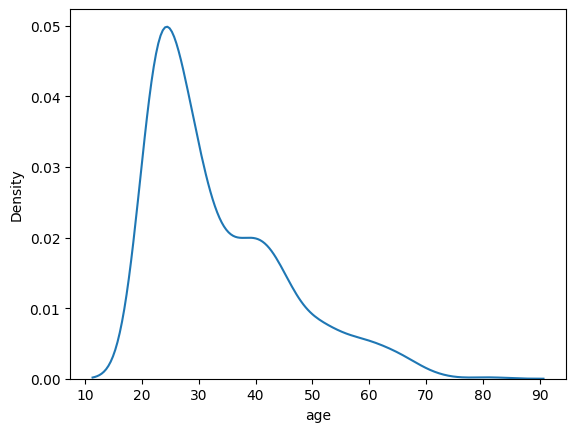

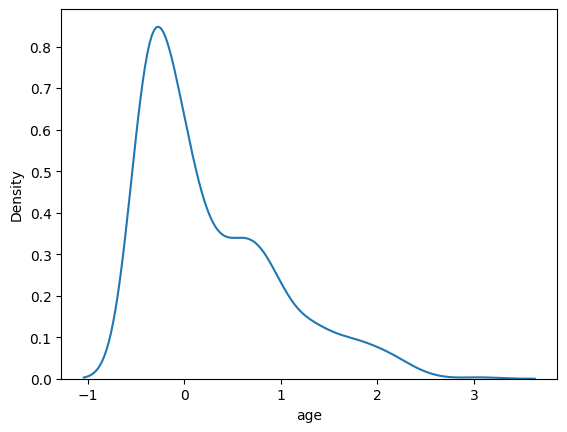

In [28]:
# Visualizando a distribuição original da variavel
sn.kdeplot(X_train_diabetes['age'], label='original')
plt.show()

# visualizando a distribuição da variavel após transformação
sn.kdeplot(X_train_diabetes_robust['age'], label='scaled')
plt.show()

Note que o range muda, fica mais comportado, e que **não há outliers**.

``Normalização``: Use a normalização quando suas características não seguem uma distribuição normal e você deseja manter as características dentro de um intervalo específico. Isso é comum em algoritmos que usam distâncias, como algoritmos de clusterização (k-Means) e redes neurais.

``Padronização``: Use a padronização quando seus dados seguem uma distribuição normal ou aproximadamente normal. Isso é apropriado para algoritmos que assumem que os dados estão centrados na média e têm uma escala semelhante, como regressão linear, análise de componentes principais (PCA) e Support Vector Machines (SVM).

> **OBSERVAÇÃO**: Não há uma regra de ouro ou garantia de melhoria do modelo utilizando algum transformador. Só podemos realmente falar algo após o treinamento do modelo. Além disso, um mesmo modelo pode se beneficiar de diferentes transformadores em situações diferentes. Porém, vale salientar que determinados algoritmos, como PCA ou KMeans, exigem a aplicação de um transformador específico. No geral, as performances são parecidas com diferentes transformadores, mas essa é uma configuração que pode ser ajustada para resultar na melhor performance possível.